In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your data into a DataFrame named 'data'
data = pd.read_csv('/content/texture.dat', header=None, delim_whitespace=True)

# Display the shape of the dataset
print("Data Shape:", data.shape)

# Display the first few rows of the dataset
print("\nFirst few rows of the data:")
print(data.head())

# Basic statistics of the dataset
print("\nBasic Statistics:")
print(data.describe())

Data Shape: (5500, 41)

First few rows of the data:
         0         1         2         3         4         5         6   \
0 -1.222603 -0.797777 -0.867442 -0.638876 -0.545102 -0.411814 -0.794503   
1 -1.410172 -1.029307 -1.013403 -0.895231 -0.762278 -0.676065 -1.042582   
2 -1.107047 -0.648643 -0.629452 -0.492366 -0.366868 -0.298053 -0.682107   
3 -1.269861 -0.854816 -0.957672 -0.707410 -0.619459 -0.469178 -0.872284   
4 -1.330774 -0.862379 -0.761418 -0.689331 -0.497805 -0.360563 -0.857457   

         7         8         9   ...        31        32        33        34  \
0 -0.629350 -0.546755 -0.867801  ... -0.765998 -0.554656 -0.713732 -0.545331   
1 -0.850958 -0.775451 -1.036857  ... -0.918643 -0.770074 -0.847047 -0.663113   
2 -0.478049 -0.394672 -0.680632  ... -0.691993 -0.445496 -0.587849 -0.371414   
3 -0.705096 -0.619912 -0.987859  ... -0.828846 -0.718579 -0.773799 -0.616815   
4 -0.599789 -0.495506 -0.779343  ... -0.861218 -0.570864 -0.784200 -0.545229   

         35     

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load your data
data = pd.read_csv('/content/texture.dat', header=None, delim_whitespace=True)
X = data.iloc[:, :-1].values  # Exclude the last column if it's a label

# Apply GMM with different number of components (e.g., 1 to 10)
for n_components in range(1, 11):
    gmm = GaussianMixture(n_components=n_components, n_init=3).fit(X)

    # Print out the relevant information for each model
    print(f'---- GMM with {n_components} components ----')
    print('Weights:', gmm.weights_)
    print('Means:', gmm.means_)
    print('Log-Likelihood:', gmm.lower_bound_, '\n')

---- GMM with 1 components ----
Weights: [1.]
Means: [[-1.09830229 -0.58669107 -0.58384806 -0.40464503 -0.33065418 -0.24216194
  -0.60264699 -0.43215566 -0.33170848 -0.59781007 -1.09830229 -0.59287769
  -0.40190039 -0.62698724 -0.44822005 -0.57633144 -0.73311575 -0.49194639
  -0.47266215 -0.48310165 -1.09830229 -0.73628201 -0.7770588  -0.57699912
  -0.50851686 -0.40377437 -0.72793703 -0.58629633 -0.50903867 -0.77084012
  -1.09830229 -0.64626533 -0.491891   -0.6435359  -0.49179945 -0.59341163
  -0.77954753 -0.55409363 -0.52300431 -0.56765504]]
Log-Likelihood: 90.34145089977442 

---- GMM with 2 components ----
Weights: [0.44731264 0.55268736]
Means: [[-1.15922563 -0.74466198 -0.84952522 -0.58518303 -0.52037406 -0.3974295
  -0.75687594 -0.61766187 -0.52970311 -0.88094814 -1.15922563 -0.76648673
  -0.69962617 -0.7313804  -0.61529478 -0.68251915 -0.90102326 -0.70112096
  -0.6726865  -0.7963986  -1.15922563 -0.89441048 -0.95468134 -0.7804639
  -0.71471391 -0.61972575 -0.89201097 -0.7709004 

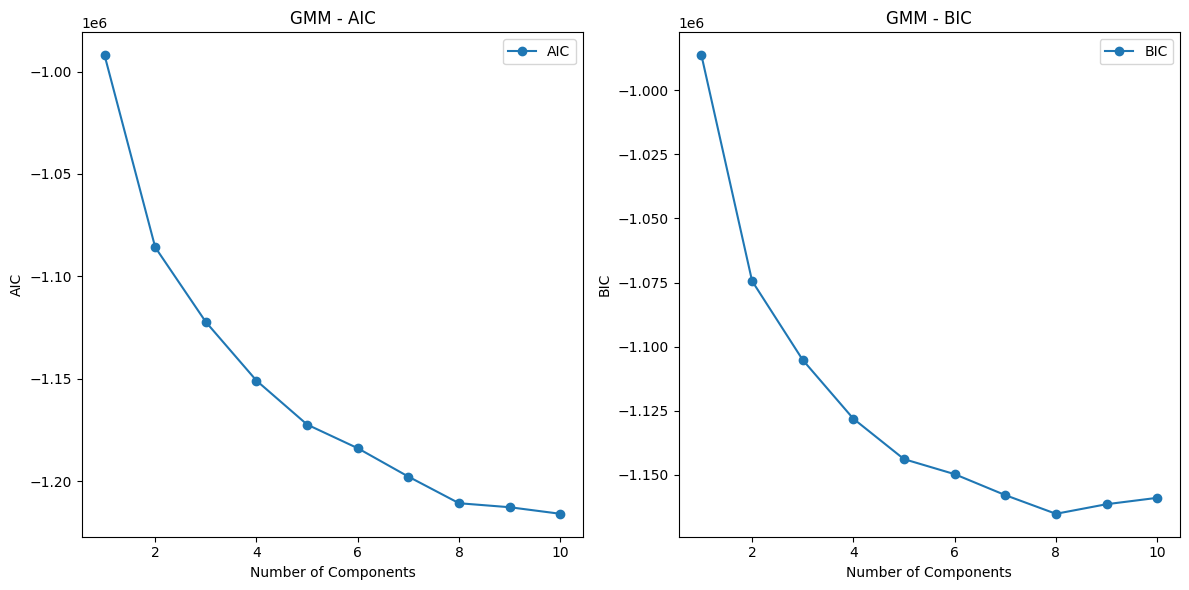

In [ ]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assuming 'X' is the data matrix
X = data.iloc[:, :-1].values  # Exclude the last column if it's a label

# Lists to store AIC and BIC values
aics = []
bics = []

# Range of number of components to try
n_components_range = range(1, 11)

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, n_init=3).fit(X)
    aics.append(gmm.aic(X))
    bics.append(gmm.bic(X))

# Plotting AIC and BIC
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.title('GMM - AIC')
plt.xlabel('Number of Components')
plt.ylabel('AIC')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.title('GMM - BIC')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.legend()

plt.tight_layout()
plt.show()


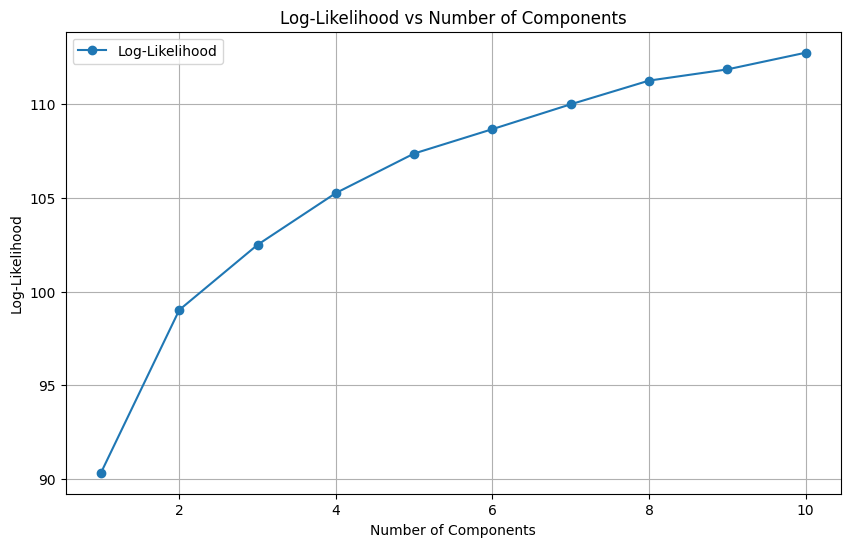

In [ ]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assuming 'X' is the data matrix
X = data.iloc[:, :-1].values  # Exclude the last column if it's a label

# List to store log-likelihood values
log_likelihoods = []

# Range of number of components to try
n_components_range = range(1, 11)

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, n_init=3).fit(X)
    log_likelihoods.append(gmm.lower_bound_)

# Plotting Log-Likelihood
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, log_likelihoods, label='Log-Likelihood', marker='o')
plt.title('Log-Likelihood vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.grid(True)
plt.show()
